# Lending Club Case Study

### Business Understanding

We work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given  contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    a. **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    b. **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    c. **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 


2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objective

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### Getting the data 

In [1]:

import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.2f}'.format(x) #format for decimal places

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv("loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,"3,005.67","3,005.67",2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,"12,231.89","12,231.89",10000,"2,214.92",16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,NaN,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

In [6]:
# Null Values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Column names with 100% null values
loan.columns[100*(loan.isnull().sum()/len(loan.index)) == 100]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [8]:
# Drop these columns
loan = loan.drop(loan.columns[100*(loan.isnull().sum()/len(loan.index)) == 100], axis = 1)

In [9]:
loan.shape

(39717, 57)

In [10]:
pd.set_option("display.max_rows", None)
100*(loan.isnull().sum()/len(loan.index))

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     6.19
emp_length                    2.71
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
desc                         32.58
purpose                          0
title                         0.03
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
mths_since_last_deli

In [11]:
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35
4,Borrower added on 12/21/11 > I plan on combi...,38


desc contains text which will not be used and mths_since_last_delinq contains delinquency data which is taken as count of months post which customer became delinquent we should drop this. 

In [12]:
# Since there are few columns with more than 30% null values we should remove them
# Drop these columns
loan = loan.drop(loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 30], axis = 1)

In [13]:
loan.shape

(39717, 53)

In [14]:
# Percentage of null values now
100*(loan.isnull().sum()/len(loan.index))

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    6.19
emp_length                   2.71
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                        0.03
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [15]:
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,"3,005.67","3,005.67",2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,"12,231.89","12,231.89",10000,"2,214.92",16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


#### Updating few values
1. Changing term to Term_in_months and removing "months" from the column values
2. Removing '%' from int_rate columnfrom the column values
3. Removing '+ years', '<' and 'year' from emp_length column from the column values and renaming column to emp_length_years

In [18]:
loan.rename(
    columns=({ 'term': 'Term_in_months', 'emp_length': 'emp_length_years'}), 
    inplace=True,
)

loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')
loan['Term_in_months'] = loan['Term_in_months'].str.rstrip(' months').astype('int')

In [19]:
loan['emp_length_years'].isnull().sum()

1075

In [20]:
loan = loan[~loan['emp_length_years'].isnull()]

In [21]:
loan['emp_length_years'] = loan['emp_length_years'].map(lambda x: "0" if x == "< 1 year" else x)
loan['emp_length_years'] = loan['emp_length_years'].map(lambda x: x.lstrip(' +').rstrip(' +years'))
loan['emp_length_years'] = loan['emp_length_years'].astype('int')

In [22]:
loan.emp_length_years.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [23]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,Term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,"3,005.67","3,005.67",2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,"12,231.89","12,231.89",10000,"2,214.92",16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   Term_in_months              38642 non-null  int32  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length_years            38642 non-null  int32  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [25]:
# Remove unnecessary columns "id","member_id","url","zip_code","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"
unnecessary = ["id","title","member_id","url","zip_code","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type","out_prncp","out_prncp_inv","collections_12_mths_ex_med","policy_code","acc_now_delinq","chargeoff_within_12_mths","tax_liens","delinq_amnt"]
loan.drop(labels = unnecessary, axis =1, inplace=True)

In [26]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,Term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,9,f,"5,863.16","5,833.84",5000,863.16,0,0,0
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,GA,1,4,f,"1,008.71","1,008.71",456.46,435.17,0,117.08,0
2,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,10,f,"3,005.67","3,005.67",2400,605.67,0,0,0
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,CA,20,37,f,"12,231.89","12,231.89",10000,"2,214.92",16.97,0,0
4,3000,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000,Source Verified,Dec-11,Current,n,other,OR,17.94,38,f,"3,513.33","3,513.33","2,475.94","1,037.39",0,0,0


In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   funded_amnt           38642 non-null  int64  
 2   funded_amnt_inv       38642 non-null  float64
 3   Term_in_months        38642 non-null  int32  
 4   int_rate              38642 non-null  float64
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_title             37202 non-null  object 
 9   emp_length_years      38642 non-null  int32  
 10  home_ownership        38642 non-null  object 
 11  annual_inc            38642 non-null  float64
 12  verification_status   38642 non-null  object 
 13  issue_d               38642 non-null  object 
 14  loan_status           38642 non-null  object 
 15  pymnt_plan         

Since our goal is to identify risky loan applicants, we dont need to analyze the loans in current state, so we will drop those

In [28]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [29]:
loan = loan[loan['loan_status'] != 'Current']

In [30]:
loan.shape

(37544, 28)

In [31]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,Term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,9,f,"5,863.16","5,833.84",5000,863.16,0,0,0
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,GA,1,4,f,"1,008.71","1,008.71",456.46,435.17,0,117.08,0
2,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,10,f,"3,005.67","3,005.67",2400,605.67,0,0,0
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,CA,20,37,f,"12,231.89","12,231.89",10000,"2,214.92",16.97,0,0
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,12,f,"5,632.21","5,632.21",5000,632.21,0,0,0


## Data Analysis

#### Now that our data is cleaned we will move on to Data Analysis

In [32]:
# Deriving few important new columns based on our business understanding that will be helpful in our analysis.
#Loan amount to Annual Income ratio
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [33]:
# Extract Year & Month from Issue date
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan['issue_year'] = loan['issue_year'].map(lambda x: "20"+x)
loan['issue_year'] = loan['issue_year'].astype('int')
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,2011
1,Dec-11,Dec,2011
2,Dec-11,Dec,2011
3,Dec-11,Dec,2011
5,Dec-11,Dec,2011


In [34]:
# Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

In [35]:
# Create Bins
# 1. Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [36]:
# 2. Annual Income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [37]:
# 3. Interest rates
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

### Univariate Analysis

**Continuous Variables**
In case of continuous variables we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

**Categorical Variables**
For categorical variables we will use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    sns.color_palette("Paired")    
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(22,9))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0], color = "blue")
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v', color = "blue")
        ax[2].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile", color = "blue")
       
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()


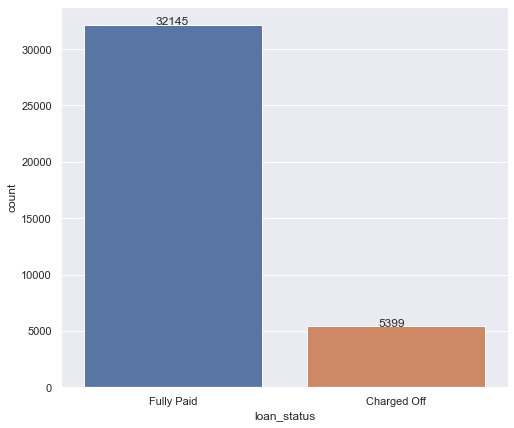

In [40]:
# Loan Status
univariate(df=loan,col='loan_status',vartype=1)

#### Here we can see that around 15% of loans are charged off

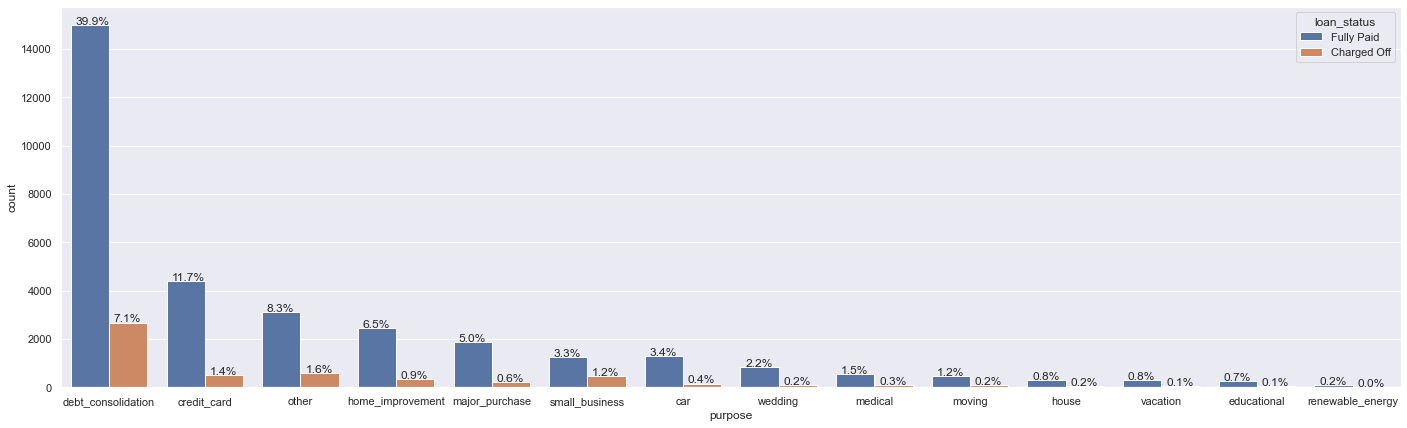

In [41]:
#Loan Purpose
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

#### Around 60% of the applicants applied loan for Debt Consolidation

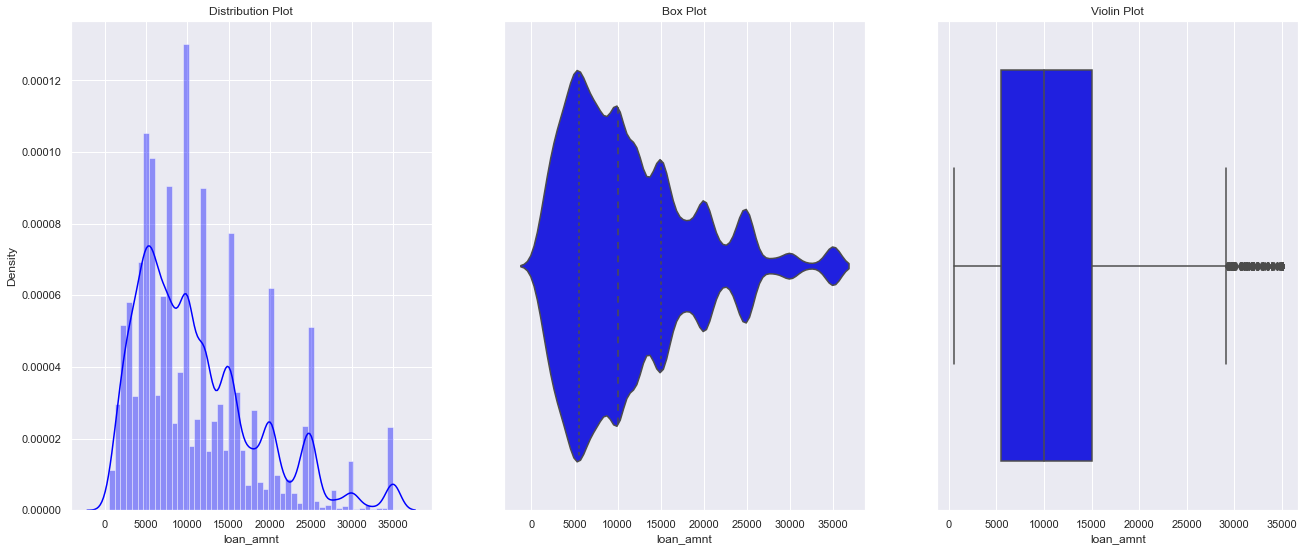

In [42]:
# Loan Amount
univariate(df=loan,col='loan_amnt',vartype=0)

Most of the loan amounts are distributed between 5500 to 15000 USD.

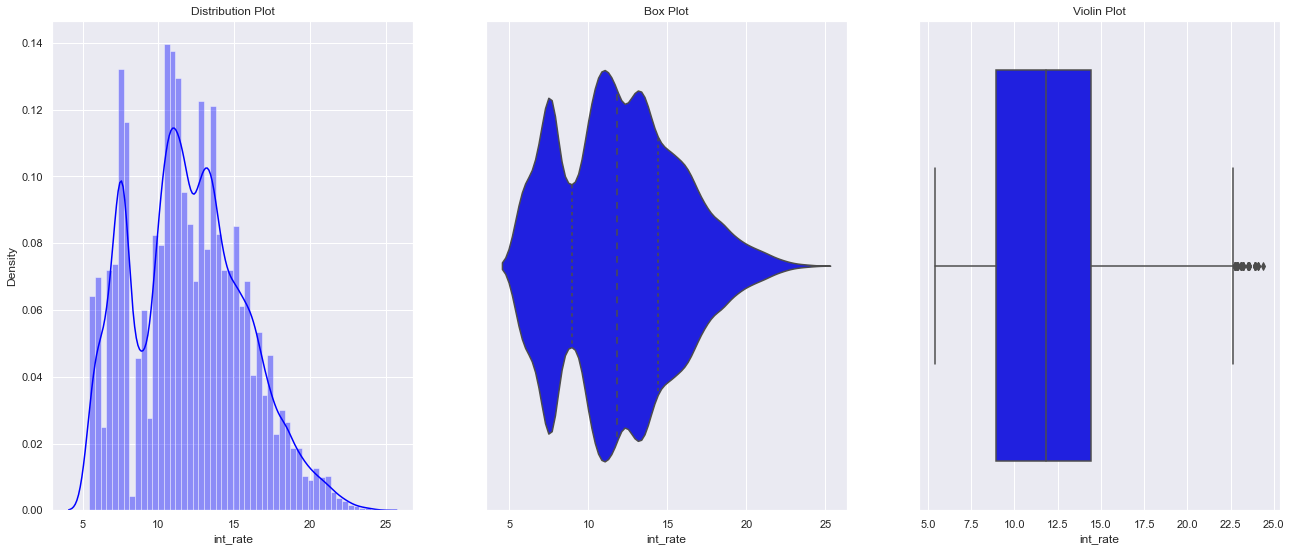

In [43]:
#Interest Rate
univariate(df=loan,col='int_rate',vartype=0)

Loan interest rates are distributed between 10% to 16%.

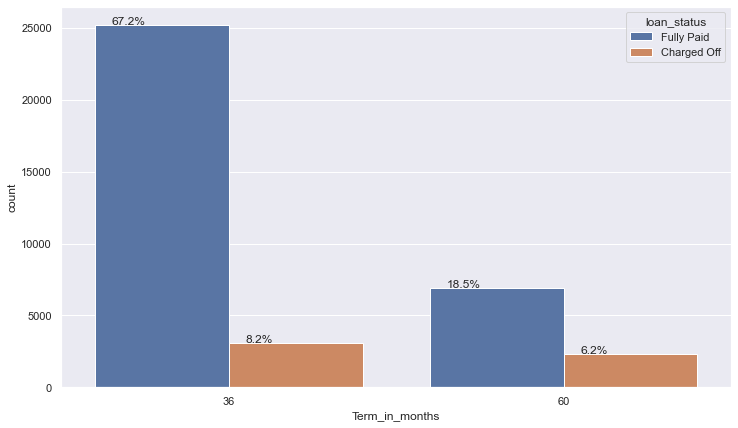

In [44]:
#Loan Term
univariate(df=loan,col='Term_in_months',vartype=1,hue='loan_status')

#### Around 75% of applicants applied loan for 36 months term period. if compared with in group, the long term have high default

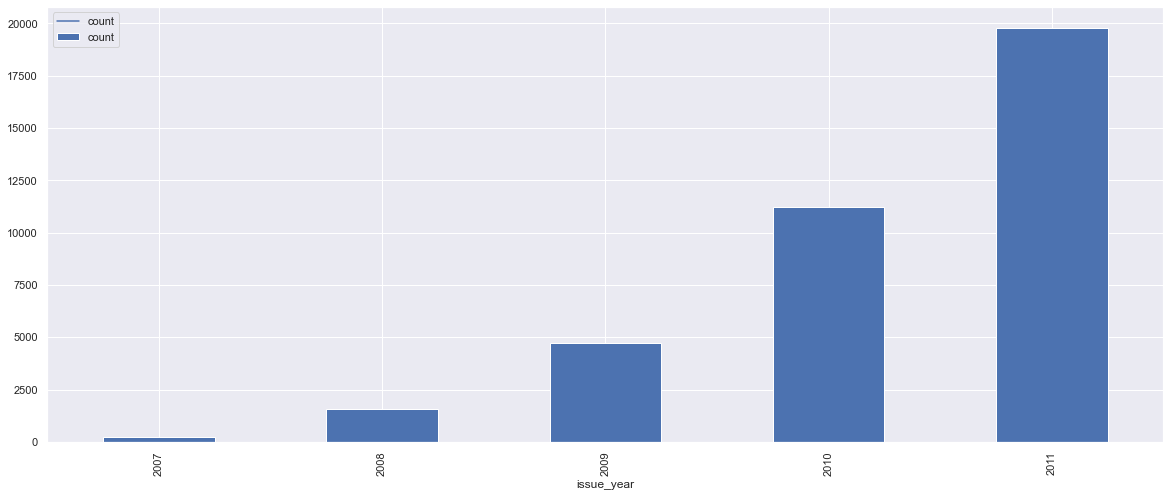

In [45]:
# Year wise loan stength
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Loan applications are increasing year on year

In [46]:
#Annual Income
loan["annual_inc"].describe()

count       37544
mean    69,407.08
std     64,676.98
min          4000
25%         41000
50%         60000
75%         83000
max       6000000
Name: annual_inc, dtype: float64

Max value is 6000000 which is around 100 times more than mean value, so we will remove the outliers from Annual Income. Remove Outliers (values from 99 to 100%)

In [47]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.995)]
loan["annual_inc"].describe()

count       37329
mean    66,746.80
std     37,320.51
min          4000
25%         41000
50%         59500
75%         82000
max        294000
Name: annual_inc, dtype: float64

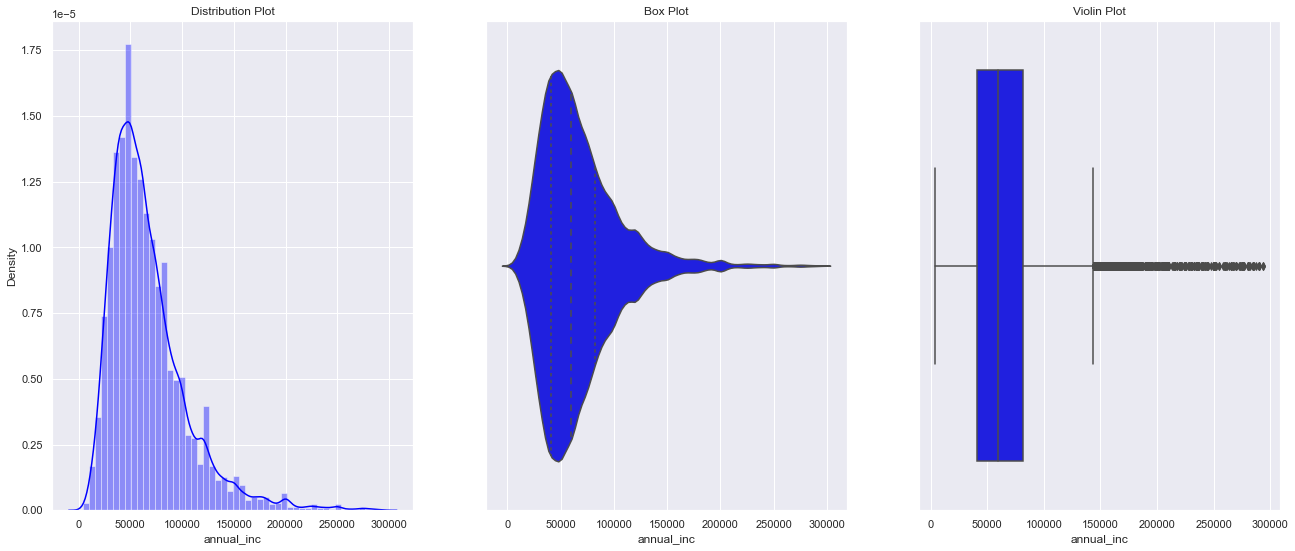

In [48]:
univariate(df=loan,col='annual_inc',vartype=0)

Most of the applicants earns between 40000 to 80000 USD annually.

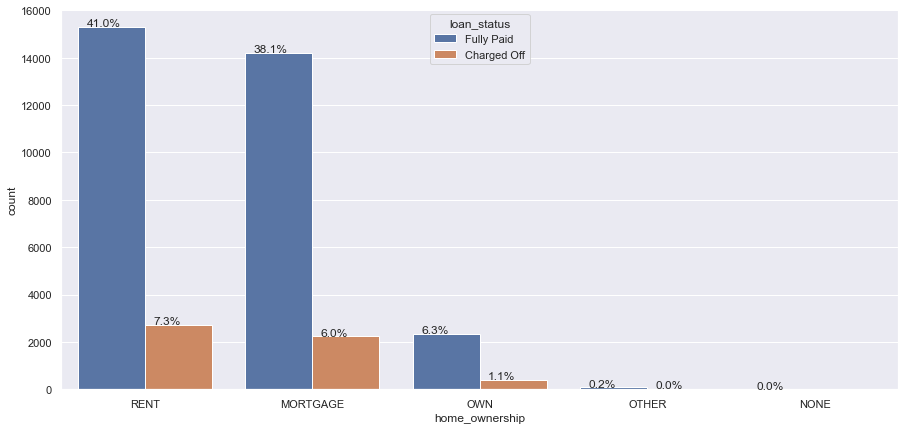

In [49]:
# Home Ownership wise Loan
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

Home ownership cannot be used as a factor for defaulting

### Bivariate/Multivariate Analysis

Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

#### Purpose of Loan vs Loan Amount for each Loan Status

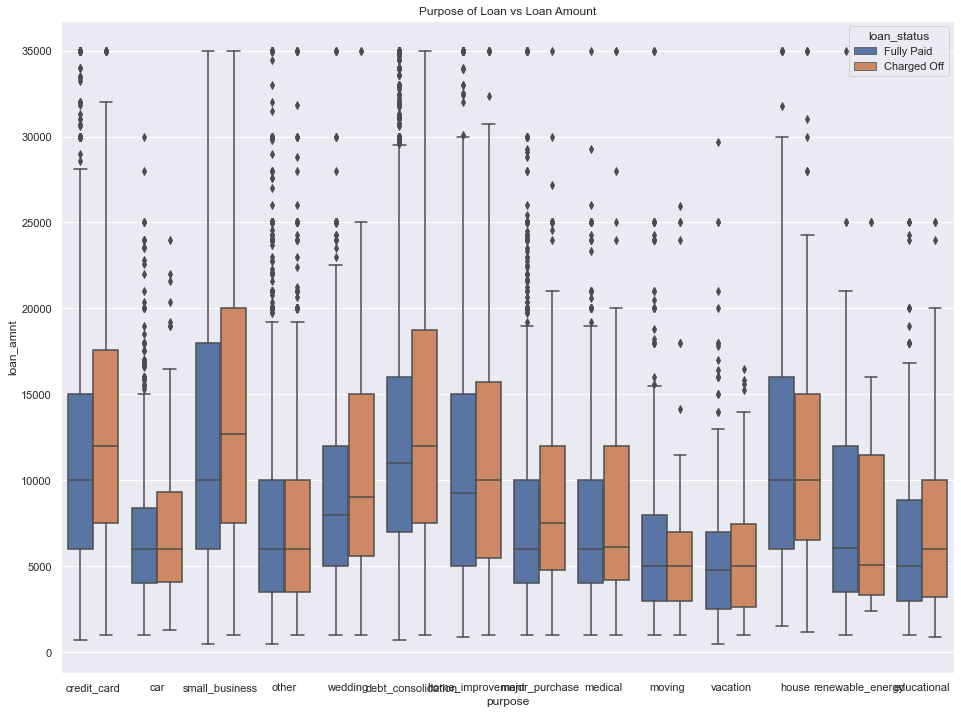

In [50]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [51]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,Term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,9,f,"5,863.16","5,833.84",5000,863.16,0,0,0,0.21,Dec,2011,0-5000,0-25000,10-12.5
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,GA,1,4,f,"1,008.71","1,008.71",456.46,435.17,0,117.08,0,0.08,Dec,2011,0-5000,25000-50000,15 and above
2,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,10,f,"3,005.67","3,005.67",2400,605.67,0,0,0,0.20,Dec,2011,0-5000,0-25000,15 and above
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,CA,20,37,f,"12,231.89","12,231.89",10000,"2,214.92",16.97,0,0,0.20,Dec,2011,5000-10000,25000-50000,12.5-15
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,12,f,"5,632.21","5,632.21",5000,632.21,0,0,0,0.14,Dec,2011,0-5000,25000-50000,7.5-10


##### Correlation Matrix

In [52]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,Term_in_months,int_rate,installment,emp_length_years,annual_inc,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,pub_rec_bankruptcies,loan_income_ratio,issue_year
loan_amnt,1,0.98,0.94,0.35,0.30,0.93,0.15,0.41,0.07,0.25,0.88,0.85,0.84,0.73,0.05,0.14,-0.03,0.62,0.11
funded_amnt,0.98,1,0.96,0.32,0.30,0.96,0.15,0.41,0.07,0.25,0.90,0.86,0.86,0.74,0.05,0.14,-0.03,0.61,0.13
funded_amnt_inv,0.94,0.96,1,0.34,0.29,0.90,0.16,0.39,0.07,0.24,0.87,0.91,0.84,0.73,0.03,0.13,-0.04,0.58,0.26
Term_in_months,0.35,0.32,0.34,1,0.44,0.09,0.11,0.07,0.08,0.10,0.31,0.32,0.20,0.51,0.01,0.11,0.02,0.28,0.24
int_rate,0.30,0.30,0.29,0.44,1,0.27,0.00,0.07,0.11,-0.05,0.29,0.28,0.17,0.52,0.10,0.13,0.08,0.21,0.04
installment,0.93,0.96,0.90,0.09,0.27,1,0.12,0.41,0.06,0.22,0.86,0.82,0.85,0.64,0.06,0.12,-0.03,0.56,0.06
emp_length_years,0.15,0.15,0.16,0.11,0.00,0.12,1,0.17,0.05,0.21,0.13,0.14,0.12,0.12,-0.02,0.03,0.06,-0.00,0.12
annual_inc,0.41,0.41,0.39,0.07,0.07,0.41,0.17,1,-0.12,0.37,0.39,0.38,0.39,0.28,0.01,0.04,-0.01,-0.31,0.04
dti,0.07,0.07,0.07,0.08,0.11,0.06,0.05,-0.12,1,0.23,0.06,0.07,0.04,0.11,-0.01,0.03,0.01,0.14,0.09
total_acc,0.25,0.25,0.24,0.10,-0.05,0.22,0.21,0.37,0.23,1,0.22,0.21,0.23,0.15,-0.02,0.02,-0.01,-0.06,0.05


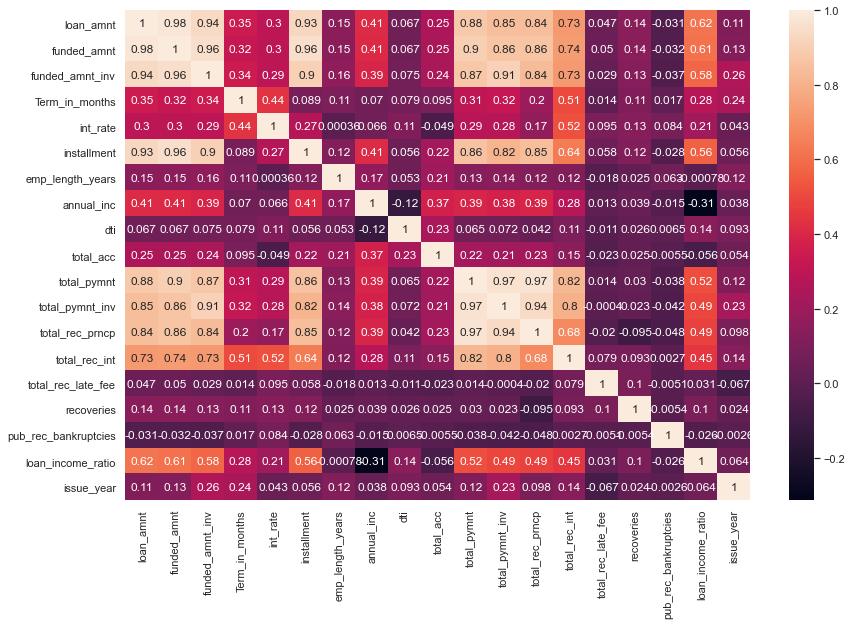

In [53]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis.

In [54]:
# Employment Length vs Loan Amount for different pupose of Loan
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length_years'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

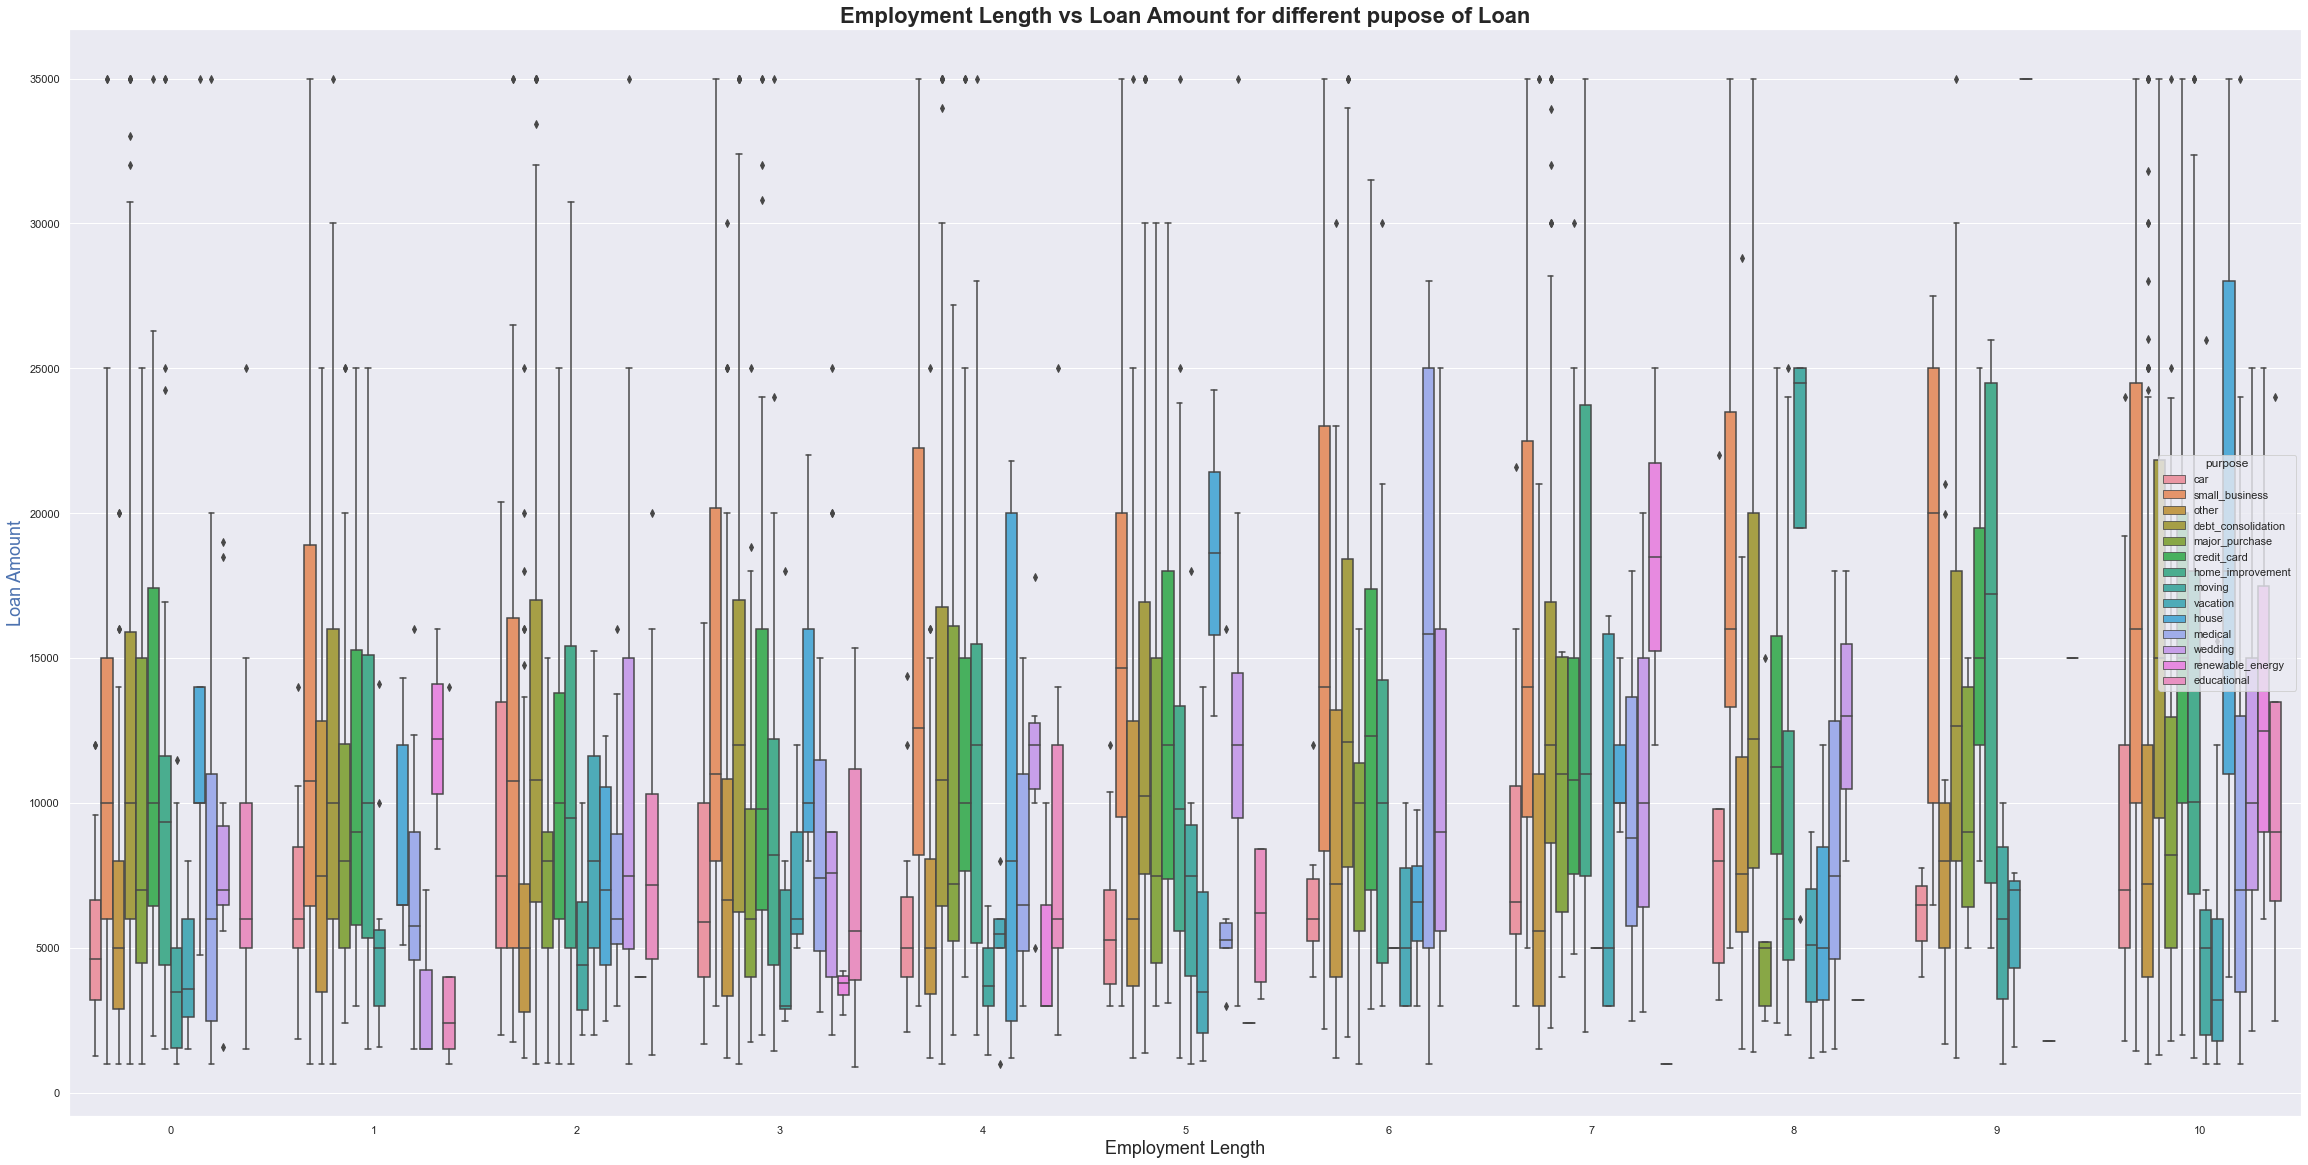

In [55]:
ax = plt.figure(figsize=(40, 20))
ax = sns.boxplot(x='emp_length_years',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=18)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=18)
plt.show()

#### Bivariate/Multivariate Analysis with Probability of Charge off

In [56]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [57]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

##### Location vs Probability Charge Off

In [58]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
addr_state,,,,
NJ,276,1477,1753,0.16
NM,29,148,177,0.16
NV,100,361,461,0.22
NY,474,3101,3575,0.13
OH,144,999,1143,0.13
OK,40,242,282,0.14
OR,69,352,421,0.16
PA,169,1264,1433,0.12
RI,25,165,190,0.13


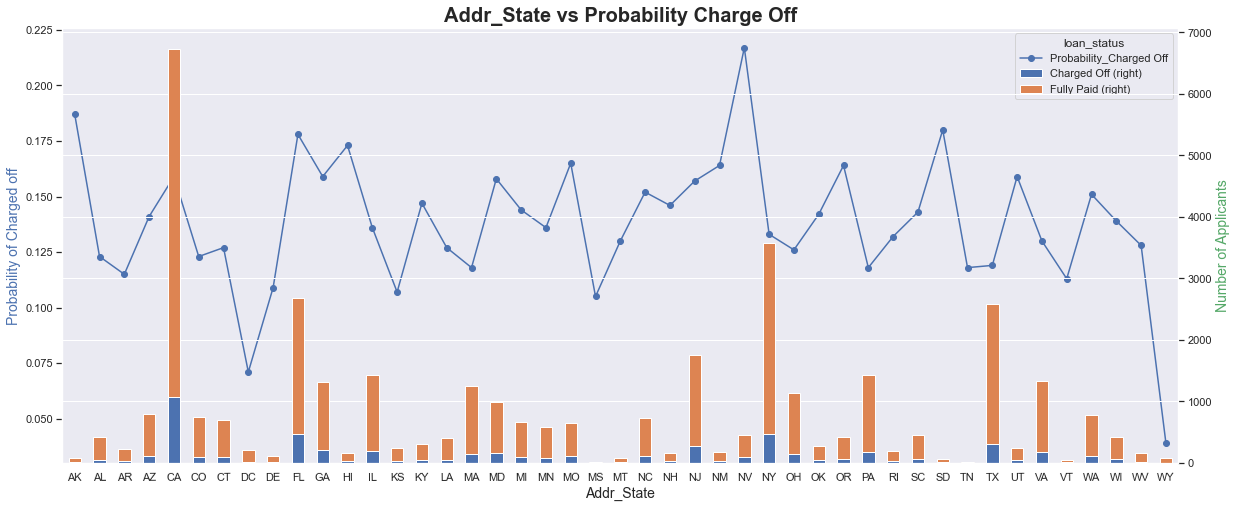

In [59]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

There are multiple States/Provinces with high probability of charge,highest being 'NV' at 22%

##### Purpose of Loan vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,155,1291,1446,0.11
credit_card,509,4370,4879,0.10
debt_consolidation,2672,14924,17596,0.15
educational,52,264,316,0.17
home_improvement,324,2410,2734,0.12
house,59,289,348,0.17
major_purchase,209,1860,2069,0.10
medical,101,551,652,0.15
moving,83,464,547,0.15


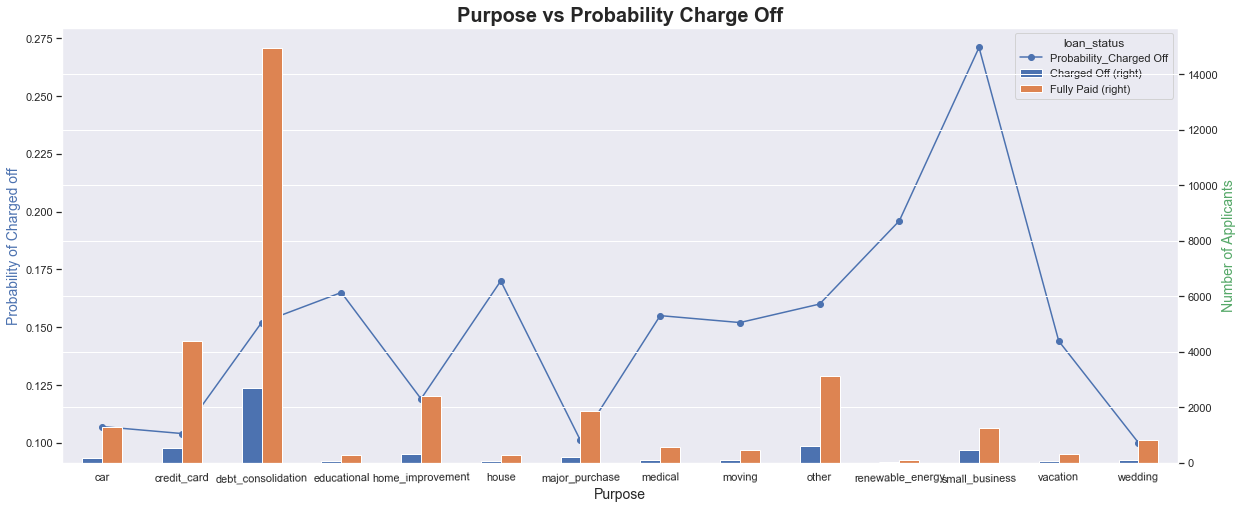

In [60]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

Applicants who have taken the Loan for 'small business' have the highest probabilty of charge off of 27%. So bank should take extra caution like take some asset or guarantee while approving the loan for purpose of 'small business'

##### Grade/Subgrade vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,558,9068,9626,0.06
B,1349,9958,11307,0.12
C,1283,6338,7621,0.17
D,1083,3867,4950,0.22
E,695,1893,2588,0.27
F,310,638,948,0.33
G,98,191,289,0.34


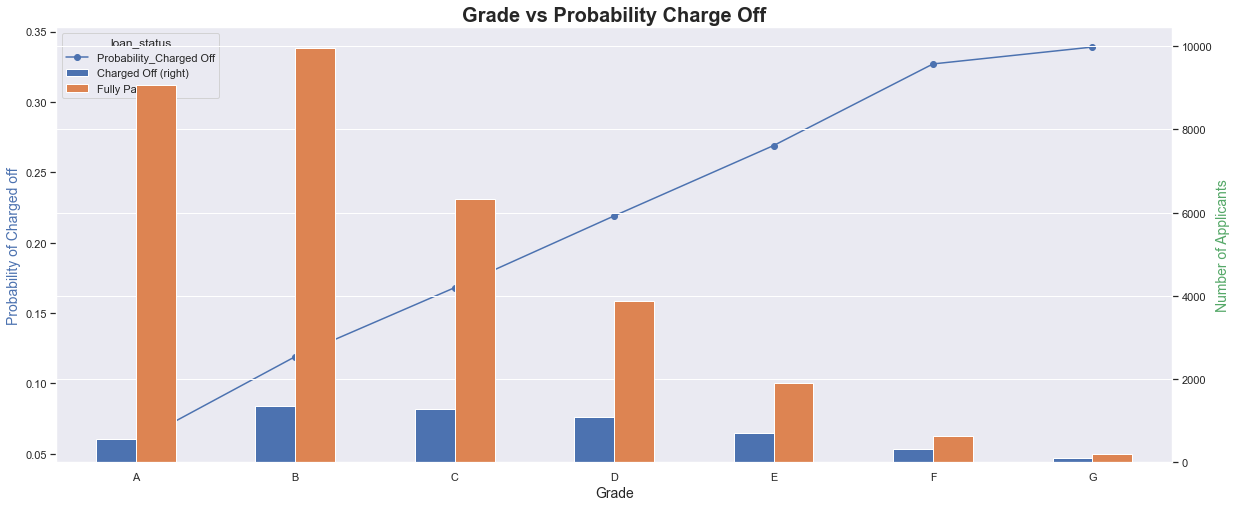

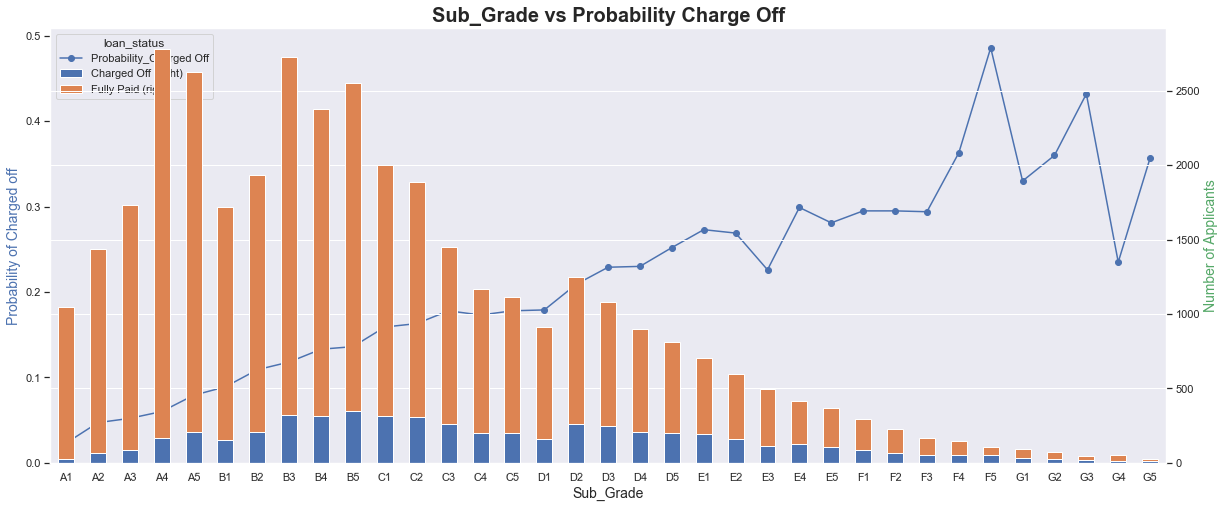

In [61]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

As we move from Grade A to G, probability that person will charged off is increasing.

##### Annual Income Range vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,
0-25000,419,1856,2275,0.18
25000-50000,2019,10384,12403,0.16
50000-75000,1648,9811,11459,0.14
75000-100000,724,5250,5974,0.12
100000 and above,566,4652,5218,0.11


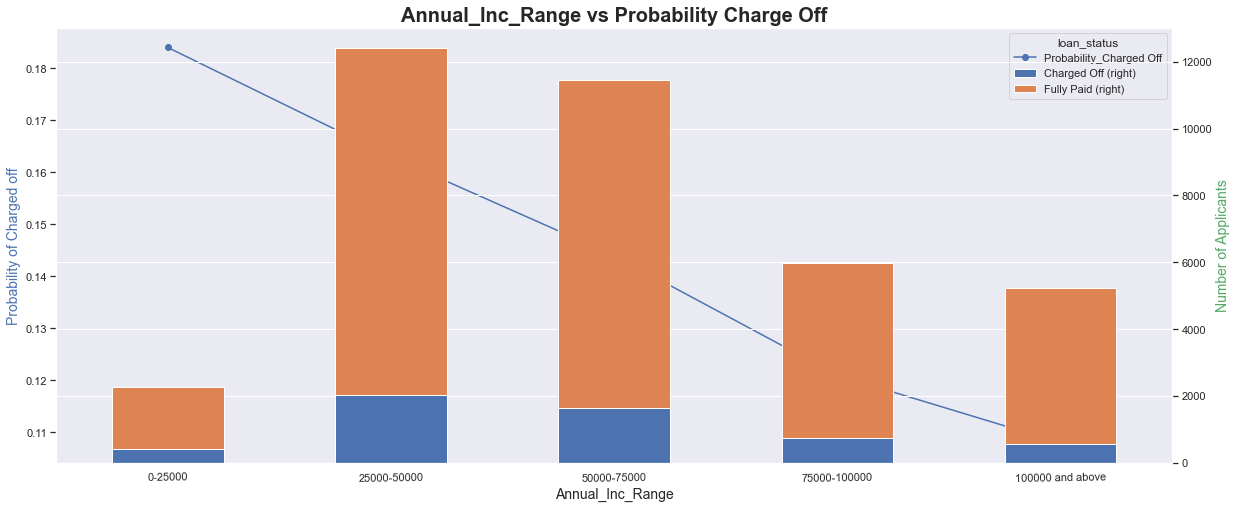

In [62]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

As the annual income is decreasing the probability that person will default is increasing with highest of 18% at (0 to 25000) salary bracket.

##### Interest rate Range vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,
0-7.5,231,4864,5095,0.04
7.5-10,530,6165,6695,0.08
10-12.5,1179,7942,9121,0.13
12.5-15,1413,7249,8662,0.16
15 and above,1736,5278,7014,0.25


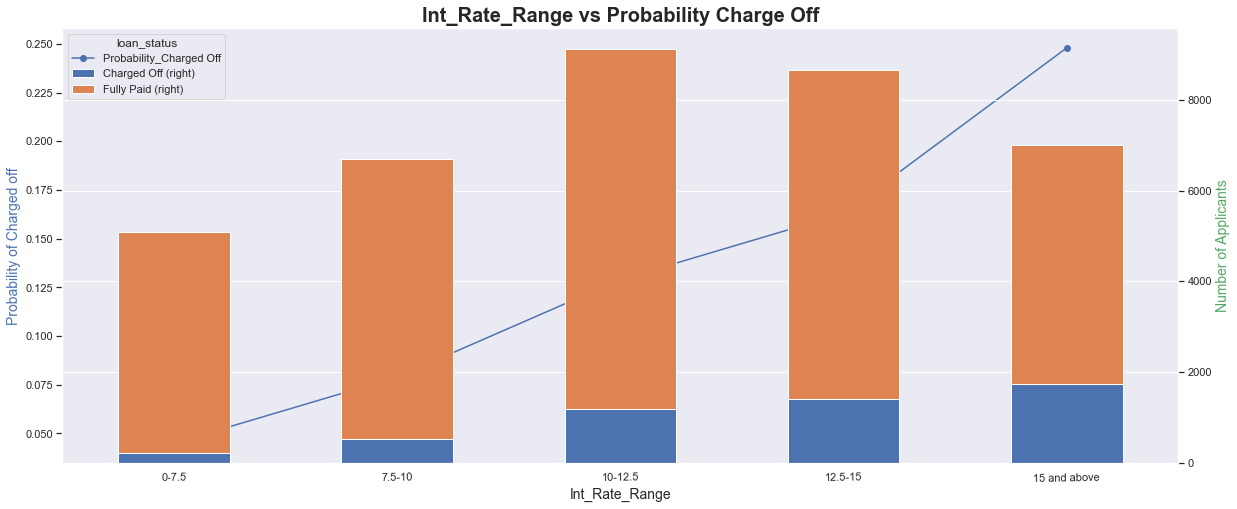

In [63]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

As the interest rate is increasing the probability that person will default is increasing with highest of 9% at 15% & above bracket.

##### Employment Length vs Probability Charge Off

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length_years,,,,
0,638,3855,4493,0.14
1,455,2696,3151,0.14
2,565,3707,4272,0.13
3,553,3437,3990,0.14
4,458,2872,3330,0.14
5,457,2721,3178,0.14
6,305,1855,2160,0.14
7,262,1442,1704,0.15
8,203,1222,1425,0.14


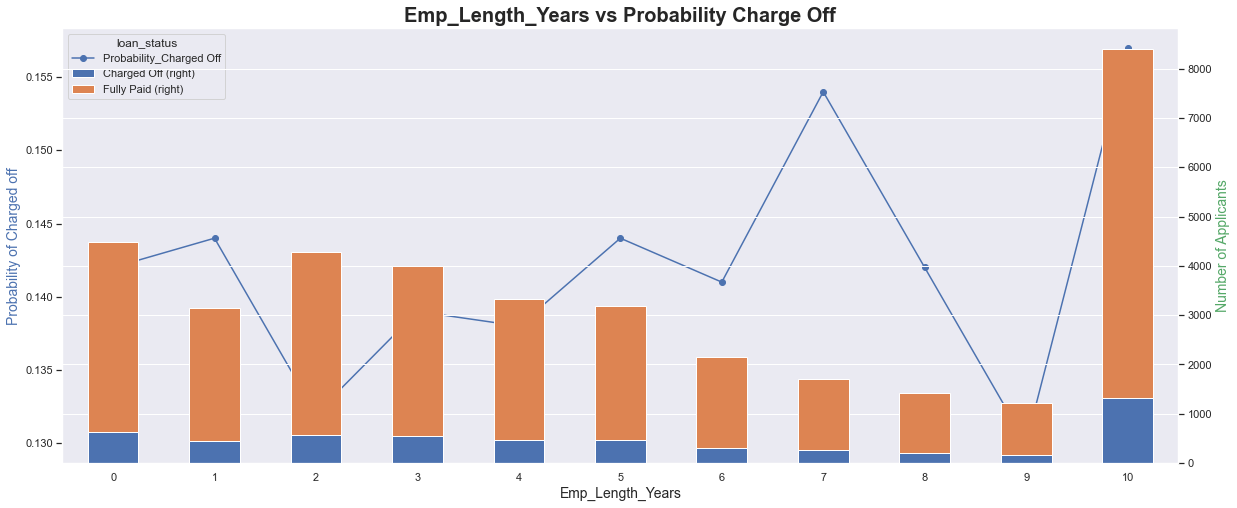

In [64]:
emp_length_years = crosstab(loan,'emp_length_years')
display(emp_length_years)

bivariate_prob(df =loan,col ='emp_length_years')

Applicants with more than 10 years of experience are more probable of charged off.

### Conclusion
Top-5 Major variables to consider for loan prediction:
1. Purpose of Loan
2. Interest Rate
3. Employment Length
4. Term
5. Grade